# Parte 1: Match Template


In [8]:
# Librerías principales
import numpy as np
import cv2 as cv
import matplotlib
from matplotlib import pyplot as plt

import imutils
import argparse

# Tipo de visualización
%matplotlib inline

# Versiones de librerías
print("".join(f"{x[0]}: {x[1]}\n" for x in [
    ("Numpy",np.__version__),
    ("openCV",cv.__version__),
    ("Matplotlib",matplotlib.__version__),
]))

Numpy: 1.22.3
openCV: 4.5.5
Matplotlib: 3.5.1



## Imágenes
Se levantan las imágenes que se emplearán como prueba del algoritmo. Se verifica el orden de los canales de color


In [9]:
# Definición de la ruta para levantar las imagenes
PATH = r'D:\Profesion\Disciplinas\vision_computadora_I\practicas\tp_3\data'

In [10]:

cc_l_1 = cv.imread(os.path.join(PATH, 'coca_logo_1.png'))
cc_l_2 = cv.imread(os.path.join(PATH, 'coca_logo_2.png'))
cc_l_3 = cv.imread(os.path.join(PATH, 'COCA-COLA-LOGO.jpg'))
cc_l_4 = cv.imread(os.path.join(PATH, 'logo_1.png'))
cc_r_1 = cv.imread(os.path.join(PATH, 'coca_retro_1.png'))
cc_r_2 = cv.imread(os.path.join(PATH, 'coca_retro_2.png'))
cc_p = cv.imread(os.path.join(PATH, 'pattern.png')) 

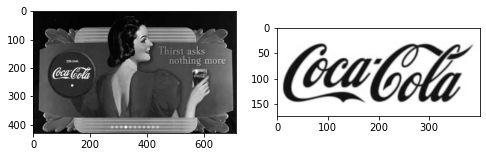

Dimensiones de las imágenes (429, 715)
Dimensiones de las imágenes (175, 400)


In [124]:
# Visualización de pruebas en escala de grises
img_prueba = cc_r_2.copy()
template = cc_p.copy()
img_gray = cv.cvtColor(img_prueba, cv.COLOR_RGB2GRAY)
t_gray = cv.cvtColor(template, cv.COLOR_RGB2GRAY)

# Verificación si ha levantado las imágenes con los canales correctos y coincide con las originales
fig = plt.figure(figsize=(8, 6))

ax2=plt.subplot(121)
ax2.imshow(img_gray, cmap='gray')

ax3=plt.subplot(122)
ax3.imshow(t_gray, cmap='gray')

plt.show()

# Verificación de dimensiones y canales
print(f'Dimensiones de las imágenes {img_gray.shape}')
print(f'Dimensiones de las imágenes {t_gray.shape}')

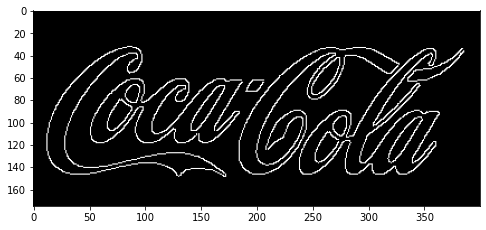

In [12]:

t_canny = cv.Canny(t_gray, 50, 250)
fig = plt.figure(figsize=(8, 6))
plt.imshow(t_canny, cmap='gray')
plt.show()


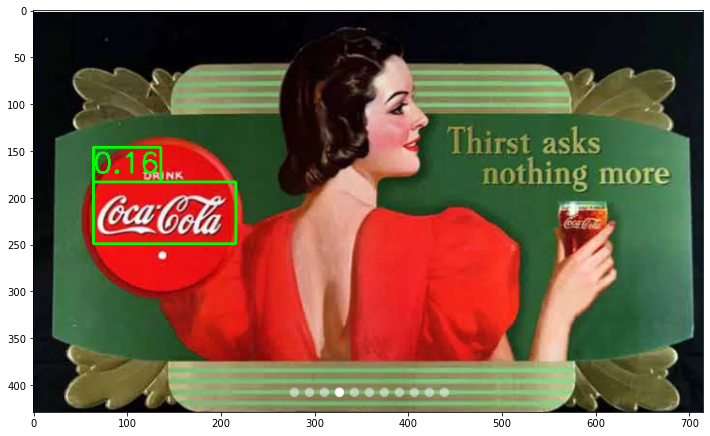

In [125]:
tH, tW = t_canny.shape


found = None
for scale in np.linspace(0.05, 4.0, 120)[::-1]:
		# resize the image according to the scale, and keep track
		# of the ratio of the resizing
		dim = (int(img_gray.shape[1] * scale), int(img_gray.shape[0] * scale))
		resized = cv.resize(img_gray, dim, interpolation = cv.INTER_AREA)
		rX = img_gray.shape[1] / float(resized.shape[1])
		rY = img_gray.shape[0] / float(resized.shape[0])
		# if the resized image is smaller than the template, then break
		# from the loop
		if resized.shape[0] < tH or resized.shape[1] < tW:
			break
        # detect edges in the resized, grayscale image and apply template
		# matching to find the template in the image
		edged = cv.Canny(resized, 50, 250)
		result = cv.matchTemplate(edged, t_canny, cv.TM_CCOEFF_NORMED)
		(_, maxVal, _, maxLoc) = cv.minMaxLoc(result)
	
		# if we have found a new maximum correlation value, then update
		# the bookkeeping variable
		if found is None or maxVal > found[0]:
			found = (maxVal, maxLoc, rX, rY)
		# unpack the bookkeeping variable and compute the (x, y) coordinates
		# of the bounding box based on the resized ratio
		(_, maxLoc, rX, rY) = found
		(startX, startY) = (int(maxLoc[0] * rX), int(maxLoc[1] * rX))
		(endX, endY) = (int((maxLoc[0] + tW) * rY), int((maxLoc[1] + tH) * rY))


img_final = cv.cvtColor(img_prueba, cv.COLOR_BGR2RGB)


label = f"{found[0]:.2f}"
(label_width, label_height), _ = cv.getTextSize(label, cv.FONT_HERSHEY_SIMPLEX, 1, 2) 
text_end = (startX + label_width, startY-15 - label_height)

cv.rectangle(img_final, (startX, startY), text_end, (0,255,0),2)
cv.rectangle(img_final, (startX, startY), (endX, endY), (0, 255, 0), 2)

cv.putText(img_final, label, (startX, startY-10), cv.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)

fig = plt.figure(figsize=(12, 10))
plt.imshow(img_final, cmap='gray')
plt.show()

In [117]:
found

(0.07623343914747238, (8, 206), 0.5641646489104116, 0.5636645962732919)